In [12]:
import json
import matplotlib.pyplot as plt
import numpy as np
from zero_temperature_anharmonic_oscillator import *

In [13]:
with open("anharmonic_oscillator_no_temp_k_6_to_9_1_step_g_minus_5.json") as f:
    sdp_data=json.load(f)
    
with open("eigen_value_check_anharmonic_oscillator_no_temp_k_6_to_9_1_step_g_minus_5.json") as f:
    eigen_data=json.load(f)

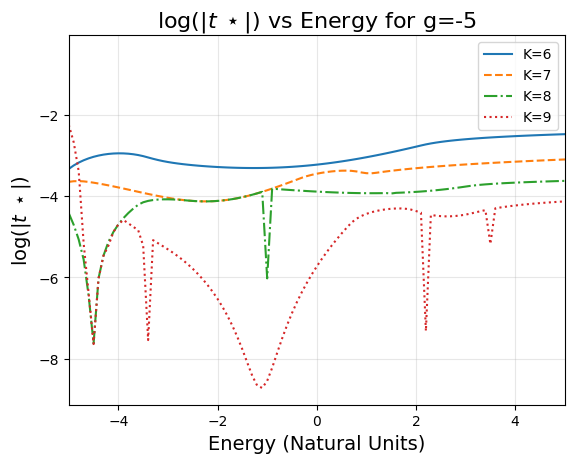

In [14]:
line_formats=['-','--','-.',':']

iter_track = 0
for k,data in sdp_data.items():
    
    energy = [item[0] for item in data]
    logtstar = [np.log(np.abs(item[2])) for item in data]
    plt.plot(energy,logtstar,ls=line_formats[iter_track],label=f"K={k}")
    iter_track+=1
plt.title(r"$\log(|t_ \star|)$ vs Energy for g=-5",fontsize=16)
plt.ylabel(r"$\log(|t_ \star|)$",fontsize=14)
plt.xlabel("Energy (Natural Units)",fontsize=14)
plt.xlim(-5,5)
plt.legend()
plt.grid(which="both",alpha=0.3)
plt.show()

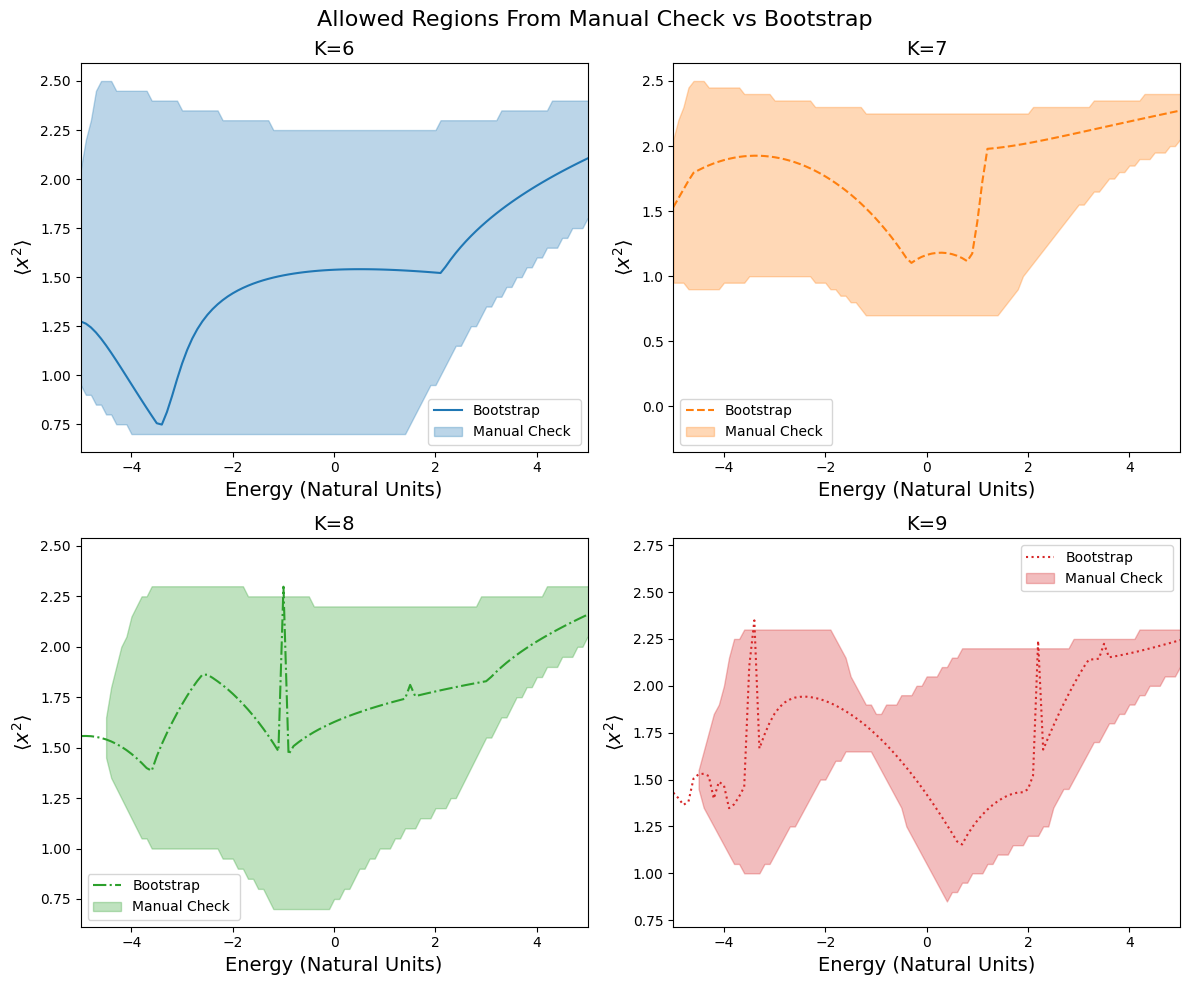

In [15]:
colors = ["#1f77b4","#ff7f0e","#2ca02c","#d62728"]

iter_track = 0
fig,axis = plt.subplots(2,2,figsize=(12,10))
axis = axis.flatten()
for k,data in sdp_data.items():
    
    energy = [item[0] for item in data]
    x2star = [item[-2] for item in data]
    #x2star_up = [item[-2] for item in rev_dat[k]]
    eigen_energy = [item[0] for item in eigen_data[k]]
    xmins = [item[1] for item in eigen_data[k]]
    xmax = [item[2] for item in eigen_data[k]]
    axis[iter_track].plot(energy,x2star,label=f"Bootstrap",ls=line_formats[iter_track],color=colors[iter_track])
    #axis[iter_track].plot(energy,x2star,label=f"Bootstrap",ls=line_formats[iter_track],color=colors[iter_track])
    axis[iter_track].fill_between(eigen_energy,xmins,xmax,label=f"Manual Check ",alpha=(0.3),color=colors[iter_track])
    axis[iter_track].legend()
    axis[iter_track].set_ylabel(r"$\langle x^2\rangle$",fontsize=14)
    axis[iter_track].set_xlabel("Energy (Natural Units)",fontsize=14)
    axis[iter_track].set_xlim(-5,5)
    axis[iter_track].set_title(f"K={k}",fontsize=14)
    
    iter_track +=1
fig.suptitle("Allowed Regions From Manual Check vs Bootstrap",fontsize=16)
plt.tight_layout()
plt.show()